# Proyek Pertama Machine Learning Terapan - Dicoding

- Nama          : Eko Rahmat Darmawan
- Email         : erdarmawan7@gmail.com
- ID Dicoding   : echo_ramled

## Prediksi Diabetes (Diabetes Prediction)

Prediksi diabetes merupakan proyek untuk memprediksi data medis seseorang terindikasi terkena diabetes atau tidak. Dataset yang digunakan menggunakan data public dari situs kaggle yang bisa diunduh <a href='https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset'>disini</a>.

Dataset berupa data medis tabular pasien dengan status diabetes (positif dan negatif). Data berisi dengan 9 kolom sebagai fitur mulai dari:
- Usia (age)
- Jenis kelamin (gender) 
- Riwayat hipertensi (hypertension)
- Riwayat penyakit jantung (heart_disease)
- Riwayat Merokok (smoking_history)
- Indeks Berat Badan / Body Mass Index (BMI)
- HbA1c Level
- Level Gula Darah (blood_glucose_level)
- Diabetes

## Load Dataset

In [51]:
# Import Library yang dibutuhkan

# Library untuk load dataset
import pandas as pd

# Library untuk data visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Library untuk model machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Library untuk evaluasi model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [52]:
# Load dataset kedalam dataframe
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [53]:
# Menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [54]:
# Menampilkan dimensi baris dan kolom dataframe
df.shape

(100000, 9)

## Data Cleaning

Merupakan proses untuk membersihkan dataset dari nilai kosong, data duplikat, dan lain-lain yang dapat mempengaruhi machine learning dalam mempelajari data

In [55]:
# Menampilkan jumlah data yang bernilai kosong setiap kolomnya
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [56]:
# Menampilkan jumlah data yang duplikat
df.duplicated().sum()

3854

In [57]:
# Menghapus data duplikat
df = df.drop_duplicates()

## Exploratory Data Analyst (EDA)

Proses untuk mempelajari karakteristik data lebih dalam. Setiap fitur atau kolom memiliki karakter yang berbeda dengan tipe data yang berbeda juga, proses ini penting untuk menentukan langkah preprocessing atau langkah berikutnya agar data dapat dipelajari algoritma machine learning dengan baik.

In [58]:
# Menampilkan nama kolom dataframe
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

### Jenis Kelamin (Gender)

In [59]:
# Menghitung kategorikal value
df['gender'].value_counts()

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

In [60]:
# Menghapus kategori Other
df.drop(df.index[df['gender'] == 'Other'], inplace=True)

print("Data gender setelah menghapus kategori Other")
df['gender'].value_counts()

Data gender setelah menghapus kategori Other


gender
Female    56161
Male      39967
Name: count, dtype: int64

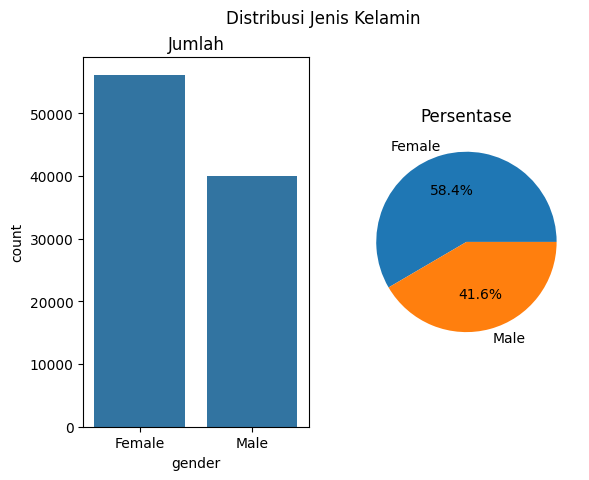

In [61]:
# Visualisasi Data Gender
fig, ax = plt.subplots(1, 2)

# Diagaram Batang merepresentasikan jumlah
sns.countplot(x='gender', data=df, ax=ax[0])
ax[0].set_title("Jumlah")

# Diagram lingkaran merepresentasikan persentase pada dataset
ax[1].pie(df['gender'].value_counts(), labels=df['gender'].value_counts().index, autopct='%1.1f%%')
ax[1].set_title("Persentase")

plt.suptitle("Distribusi Jenis Kelamin")
plt.show()

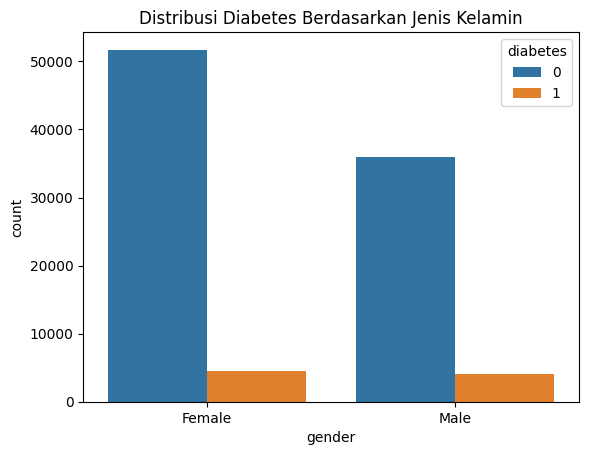

In [62]:
#Visualisasi Diabetes pada Gender

sns.countplot(x='gender', hue='diabetes', data=df)
plt.title("Distribusi Diabetes Berdasarkan Jenis Kelamin")
plt.show()

### Usia (Age)

In [63]:
# Mengetahui rata-rata usia pada data
dia_age = df[df['diabetes'] == 1]

print("Rata-rata usia pasien diabetes : ", round(dia_age['age'].mean(), 0), "tahun")
print("Rata-rata usia pasien pada dataset : ",round(df['age'].mean(), 0), "tahun")

Rata-rata usia pasien diabetes :  61.0 tahun
Rata-rata usia pasien pada dataset :  42.0 tahun


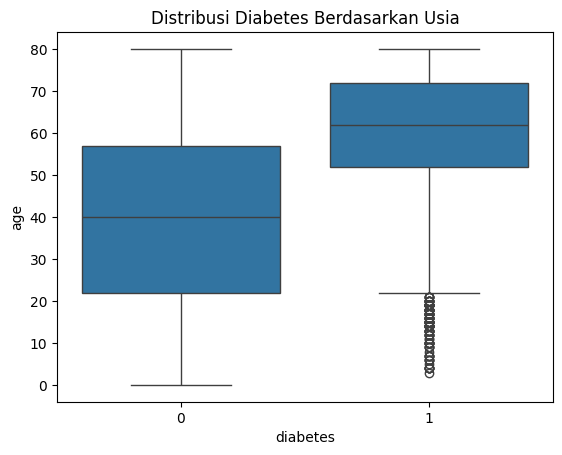

In [64]:
# Visualisasi Distribusi Data

sns.boxplot(x='diabetes', y='age', data=df)
plt.title("Distribusi Diabetes Berdasarkan Usia")
plt.show()

### Hipertensi (Hypertension)

In [65]:
# Menghitung riwayat hipertensi
df['hypertension'].value_counts()

hypertension
0    88667
1     7461
Name: count, dtype: int64

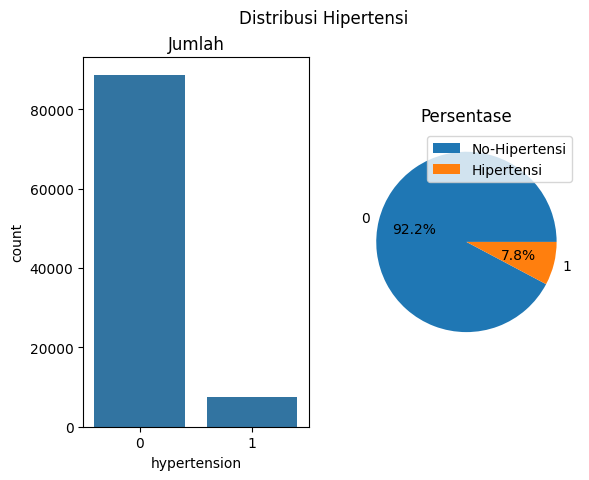

In [66]:
# Visualisasi Data Distribusi Riwayat Hipertensi
fig, ax = plt.subplots(1, 2)

# Diagram Batang merepresentasikan jumlah
sns.countplot(x='hypertension', data=df, ax=ax[0])
ax[0].set_title("Jumlah")

# Diagram Lingkaran merepresentasikan persentase
ax[1].pie(df['hypertension'].value_counts(), labels=df['hypertension'].value_counts().index, autopct='%1.1f%%')
ax[1].set_title("Persentase")

plt.suptitle("Distribusi Hipertensi")
plt.legend(['No-Hipertensi','Hipertensi'], loc='upper right')
plt.show()

### Riwayat Sakit Jantung (Heart_Disease)

In [67]:
# Menghitung distribusi kolom riwayat sakit jantung
df['heart_disease'].value_counts()

heart_disease
0    92205
1     3923
Name: count, dtype: int64

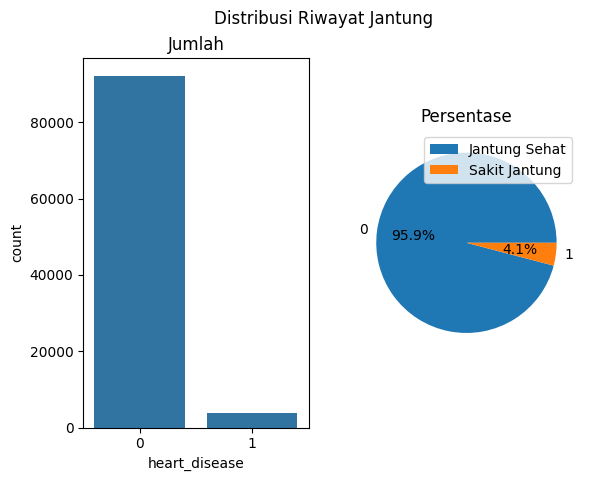

In [68]:
# Visualisasi Distribusi Riwayat Sakit Jantung
fig, ax = plt.subplots(1, 2)

# Diagram Batang merepresentasikan jumlah
sns.countplot(x='heart_disease', data=df, ax=ax[0])
ax[0].set_title("Jumlah")

# Diagram lingkaran merepresentasikan persentase
ax[1].pie(df['heart_disease'].value_counts(), labels=df['heart_disease'].value_counts().index, autopct='%1.1f%%')
ax[1].set_title("Persentase")

plt.suptitle("Distribusi Riwayat Jantung")
plt.legend(['Jantung Sehat','Sakit Jantung'], loc='upper right')
plt.show()

### Riwayat Merokok (Smoking_History)

In [69]:
# Menghitung distribusi riwayat merokok
df['smoking_history'].value_counts()

smoking_history
never          34395
No Info        32881
former          9299
current         9197
not current     6359
ever            3997
Name: count, dtype: int64

### Riwayat Merokok

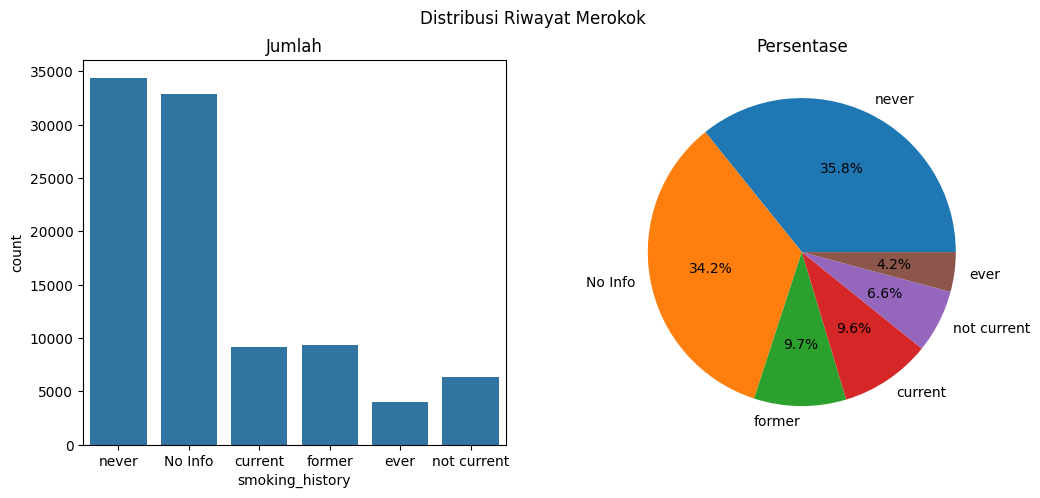

In [70]:
# Visualisasi distribusi riwayat merokok
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Diagram Batang merepresentasikan jumlah
sns.countplot(x='smoking_history', data=df, ax=ax[0])
ax[0].set_title("Jumlah")

# Diagram lingkaran merpresentasikan persentase
ax[1].pie(df['smoking_history'].value_counts(), labels=df['smoking_history'].value_counts().index, autopct='%1.1f%%')
ax[1].set_title("Persentase")

plt.suptitle("Distribusi Riwayat Merokok")
plt.show()

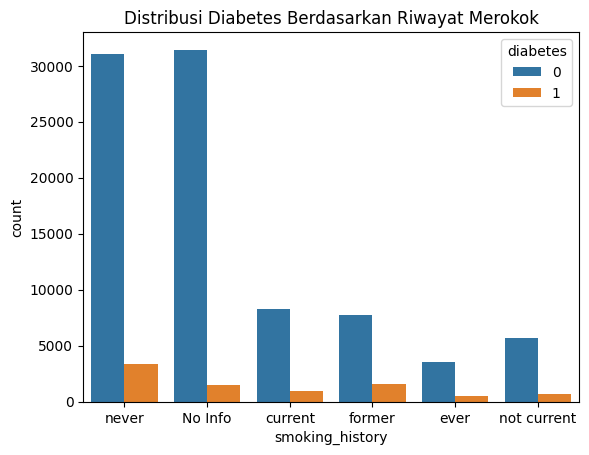

In [71]:
# Visualisasi Distribusi Diabetes Berdasarkan Riwayat Merokok
sns.countplot(x='smoking_history', hue='diabetes', data=df)
plt.title("Distribusi Diabetes Berdasarkan Riwayat Merokok")
plt.show()

### Indeks Berat Badan / Body Mass Index (BMI)

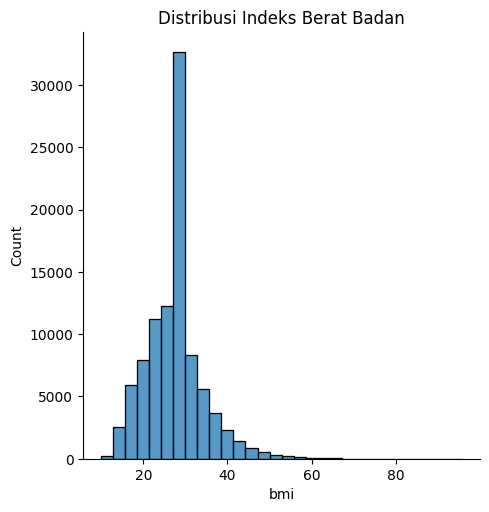

In [72]:
# Visualiasi distribusi berat badan
sns.displot(df['bmi'], bins=30)
plt.title("Distribusi Indeks Berat Badan")
plt.show()

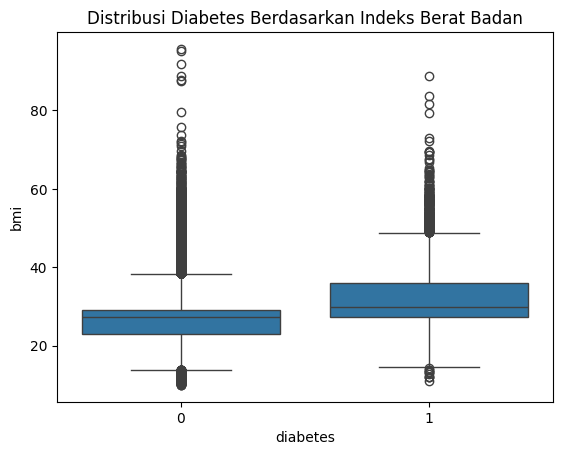

In [73]:
# Visualisasi Distribusi diabetes berdasarkan BMI
sns.boxplot(x='diabetes', y='bmi', data=df)
plt.title("Distribusi Diabetes Berdasarkan Indeks Berat Badan")
plt.show()

## Data Preprocessing

Proses menyiapkan data agar dapat digunakan pada proses training.

In [74]:
# Data Encoding untuk mengubah data kategorikal menjadi numerik
encoder = LabelEncoder()

# Mentransform nilai pada kolom gender dan smoking history menjadi numerikal
df['gender'] = encoder.fit_transform(df['gender'])
df['smoking_history'] = encoder.fit_transform(df['smoking_history'])
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [75]:
# Memisahkan Fitur dan Label

# Fitur sebagai x semua kolom kecuali kolom diabetes
x = df.drop(columns=['diabetes'], axis=1)

# Label sebagai y
y = df['diabetes']

In [76]:
# Membagi data menjadi data training untuk melatih machine learning dan data testing untuk evaluasi model
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)
x_train.shape

(76902, 8)

## Training

Proses training untuk melatih machine learning dalam mempelajari dataset yang di inputkan. Dalam proyek ini, machine learning menggunakan 2 algoritma sebagai perbandingan performa, yaitu:
- Logistic Regression
- Random Forest Classifier

### Logistic Regression

In [77]:
# Inisiasi model Logistic Regression
lr = LogisticRegression(max_iter=3000)

# Proses Training
lr.fit(x_train, y_train)

LogisticRegression(max_iter=3000)

In [81]:
# Uji prediksi menggunakan data testing
y_pred = lr.predict(x_test)

# Menghitung tingkat akurasi model
lr_acc = accuracy_score(y_test, y_pred)
print("Akurasi Model : ", round(lr_acc, 2) * 100, "%")

Akurasi Model :  96.0 %


In [82]:
# Menampilkan detail performa model Logistic Regression
lr_class = classification_report(y_test, y_pred)
print(lr_class)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17525
           1       0.86      0.62      0.72      1701

    accuracy                           0.96     19226
   macro avg       0.91      0.80      0.85     19226
weighted avg       0.95      0.96      0.95     19226



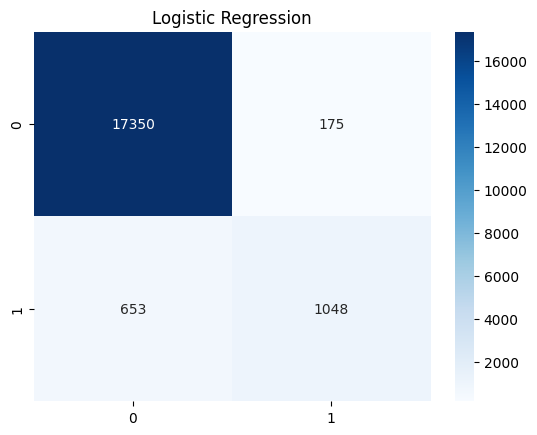

In [83]:
# Menampilkan hasil rediksi dalam bentuk confusion matrix
lr_conf = confusion_matrix(y_test, y_pred)

sns.heatmap(lr_conf, annot=True, cmap='Blues', fmt='g')
plt.title("Logistic Regression")
plt.show()

### Random Forest Classifier

In [84]:
# Inisiasi model Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Proses Training
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [85]:
# Uji prediksi menggunakan data testing
y_pred = rf.predict(x_test)

# Menghitung tingkat akurasi model
rf_acc = accuracy_score(y_test, y_pred)
print("Akurasi Model : ", round(rf_acc, 2) * 100, "%")

Akurasi Model :  97.0 %


In [86]:
# Menampilkan detail performa model Logistic Regression
rf_class = classification_report(y_test, y_pred)
print(rf_class)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17525
           1       0.95      0.67      0.78      1701

    accuracy                           0.97     19226
   macro avg       0.96      0.83      0.88     19226
weighted avg       0.97      0.97      0.96     19226



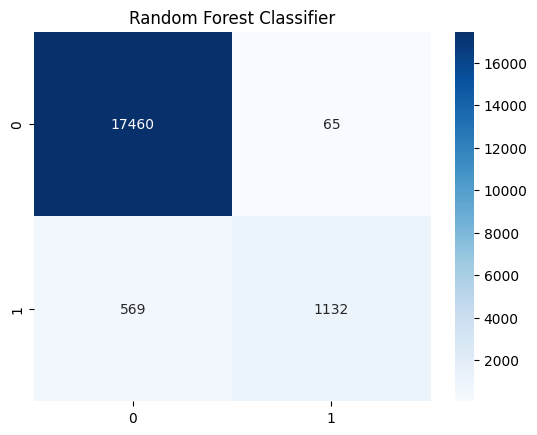

In [87]:
# Menampilkan hasil rediksi dalam bentuk confusion matrix
rf_conf = confusion_matrix(y_test, y_pred)

sns.heatmap(rf_conf, annot=True, cmap='Blues', fmt='g')
plt.title("Random Forest Classifier")
plt.show()

## Hasil

Berdasarkan hasil analisis dan evaluasi model, dari kedua algoritma machine learning yang digunakan pada proyek ini. Algoritma Random Forest Classifier memiliki tingkat akurasi lebih tinggi dibanding algoritma Logistic Regression yaitu sekitar 97%.